# 📋 Visão Geral do Projeto
Você precisa analisar como o consumo de café influencia a qualidade do sono, com três entregas principais:

1. Análise Exploratória de Dados (EDA)
1. Visualização e Insights
1. Modelo Preditivo

# 🚀 Passo 1: Preparação do Ambiente
Primeiro, vamos configurar o ambiente:

In [6]:
# Instalação de bibliotecas necessárias (se necessário)
!pip install -qq -r "./requirements.txt"

In [7]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import joblib
import warnings
import os

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Bibliotecas importadas com sucesso!")
print(f"Versão do Pandas: {pd.__version__}")
print(f"Versão do NumPy: {np.__version__}")
print(f"Versão do Matplotlib: {matplotlib.__version__}")
print(f"Versão do Seaborn: {sns.__version__}")
print(f"Versão do Joblib: {joblib.__version__}")

✅ Bibliotecas importadas com sucesso!
Versão do Pandas: 2.2.2
Versão do NumPy: 1.24.2
Versão do Matplotlib: 3.7.1
Versão do Seaborn: 0.13.2
Versão do Joblib: 1.3.2


In [8]:
# Constantes
DATA_INPUT_PATH = 'data/inputs/synthetic_coffee_health_10000(in).csv'
DATA_OUTPUT_PATH = 'data/outputs/'
SEED = 42
TEST_SIZE = 0.3
FIGURES_PATH = os.path.join(DATA_OUTPUT_PATH, "figures")
MODELS_PATH = os.path.join(DATA_OUTPUT_PATH, "models")
REPORTS_PATH = os.path.join(DATA_OUTPUT_PATH, "reports")

timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# 📊 Passo 2: Parte #1 - Análise Exploratória de Dados (EDA)
Agora vamos criar o código completo para a análise exploratória:

In [9]:
# ========================================
# PARTE 1: ANÁLISE EXPLORATÓRIA DE DADOS
# ========================================

# 1. CARREGAMENTO DOS DADOS
# ---------------------------
# Carregar o dataset
df = pd.read_csv(DATA_INPUT_PATH)

print("=" * 60)
print("CARREGAMENTO DOS DADOS")
print("=" * 60)
print(f"✅ Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas\n")


CARREGAMENTO DOS DADOS
✅ Dataset carregado com sucesso!
Dimensões: 10000 linhas x 16 colunas



In [10]:
# 2. INFORMAÇÕES INICIAIS
# ------------------------
print("=" * 60)
print("INFORMAÇÕES SOBRE O DATASET")
print("=" * 60)
print("\nPrimeiras 5 linhas:")
display(df.head())

print("\n\nInformações das Colunas:")
display(df.info())

print("\n\nTipos de Dados:")
display(df.dtypes)

INFORMAÇÕES SOBRE O DATASET

Primeiras 5 linhas:


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1




Informações das Colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 

None



Tipos de Dados:


ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

In [11]:
# 3. VERIFICAÇÃO DE QUALIDADE
# ----------------------------
print("\n" + "=" * 60)
print("VERIFICAÇÃO DE QUALIDADE DOS DADOS")
print("=" * 60)

# Valores nulos
print("\nValores Nulos por Coluna:")
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0] if valores_nulos.sum() > 0 else "✅ Nenhum valor nulo encontrado!")

# Valores duplicados
duplicados = df.duplicated().sum()
print(f"\nRegistros Duplicados: {duplicados}")
if duplicados > 0:
    print(f"⚠️ Removendo {duplicados} registros duplicados...")
    df = df.drop_duplicates()
else:
    print("✅ Nenhum registro duplicado!")


VERIFICAÇÃO DE QUALIDADE DOS DADOS

Valores Nulos por Coluna:
Health_Issues    5941
dtype: int64

Registros Duplicados: 0
✅ Nenhum registro duplicado!


In [12]:
# 4. ESTATÍSTICAS DESCRITIVAS
# ----------------------------
print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Total de categorias únicas: {df[col].nunique()}")


ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
                ID           Age  Coffee_Intake   Caffeine_mg   Sleep_Hours  \
count  10000.00000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    5000.50000     34.949100       2.509230    238.411010      6.636220   
std     2886.89568     11.160939       1.450248    137.748815      1.222055   
min        1.00000     18.000000       0.000000      0.000000      3.000000   
25%     2500.75000     26.000000       1.500000    138.750000      5.800000   
50%     5000.50000     34.000000       2.500000    235.400000      6.600000   
75%     7500.25000     43.000000       3.500000    332.025000      7.500000   
max    10000.00000     80.000000       8.200000    780.300000     10.000000   

                BMI    Heart_Rate  Physical_Activity_Hours      Smoking  \
count  10000.000000  10000.000000              10000.00000  10000.00000   
mean      23.986860     70.617800                  7.48704      0.20040   
std        3.90


ANÁLISE DE VARIÁVEIS NUMÉRICAS


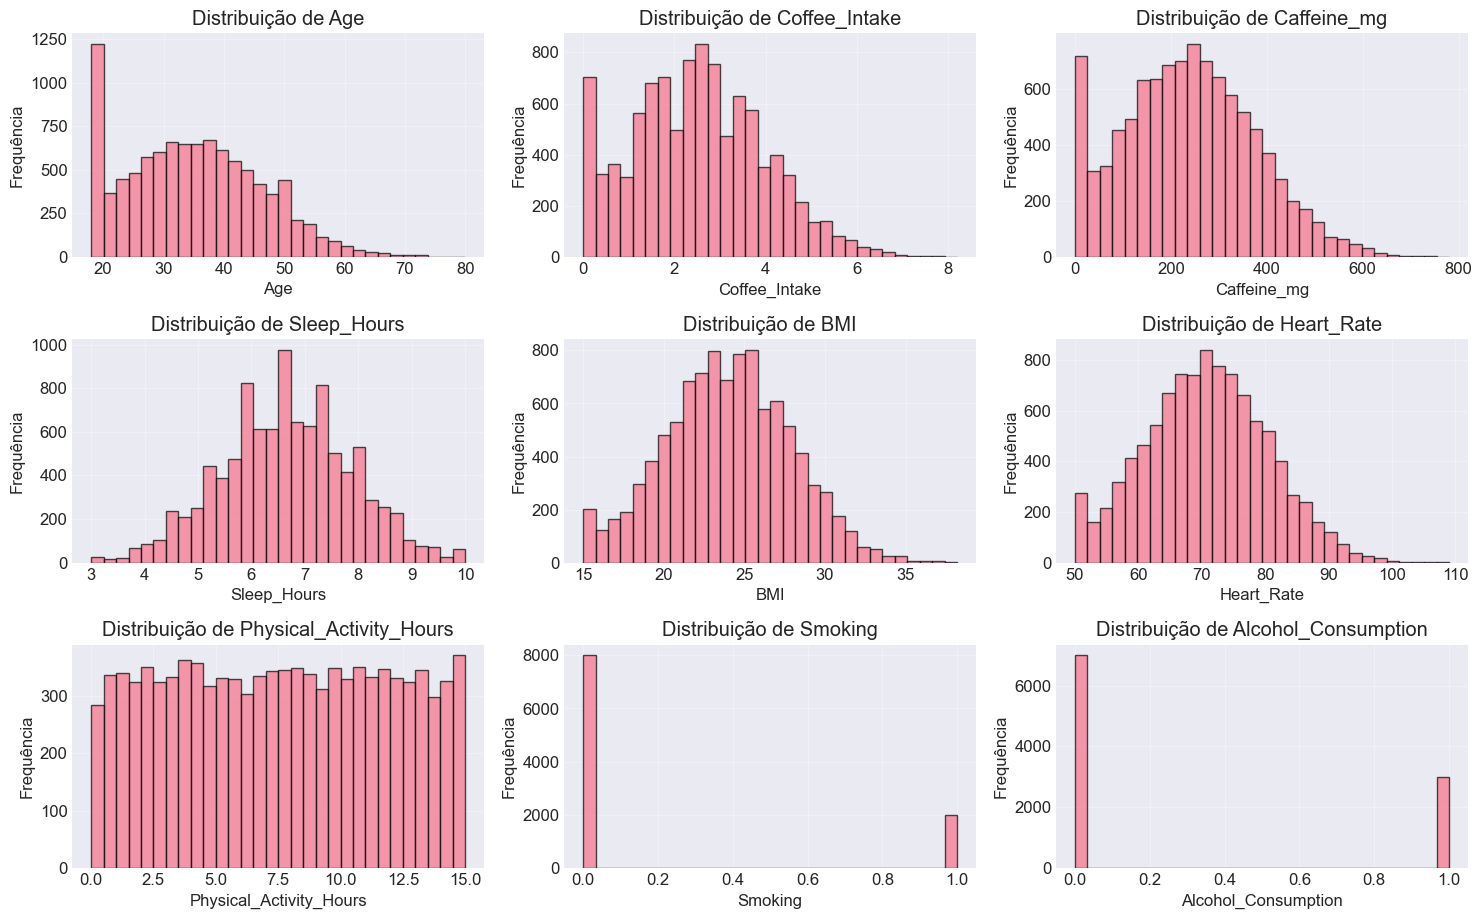

✅ Histogramas salvos em 'data/outputs/figures\histogramas_numericas.png'


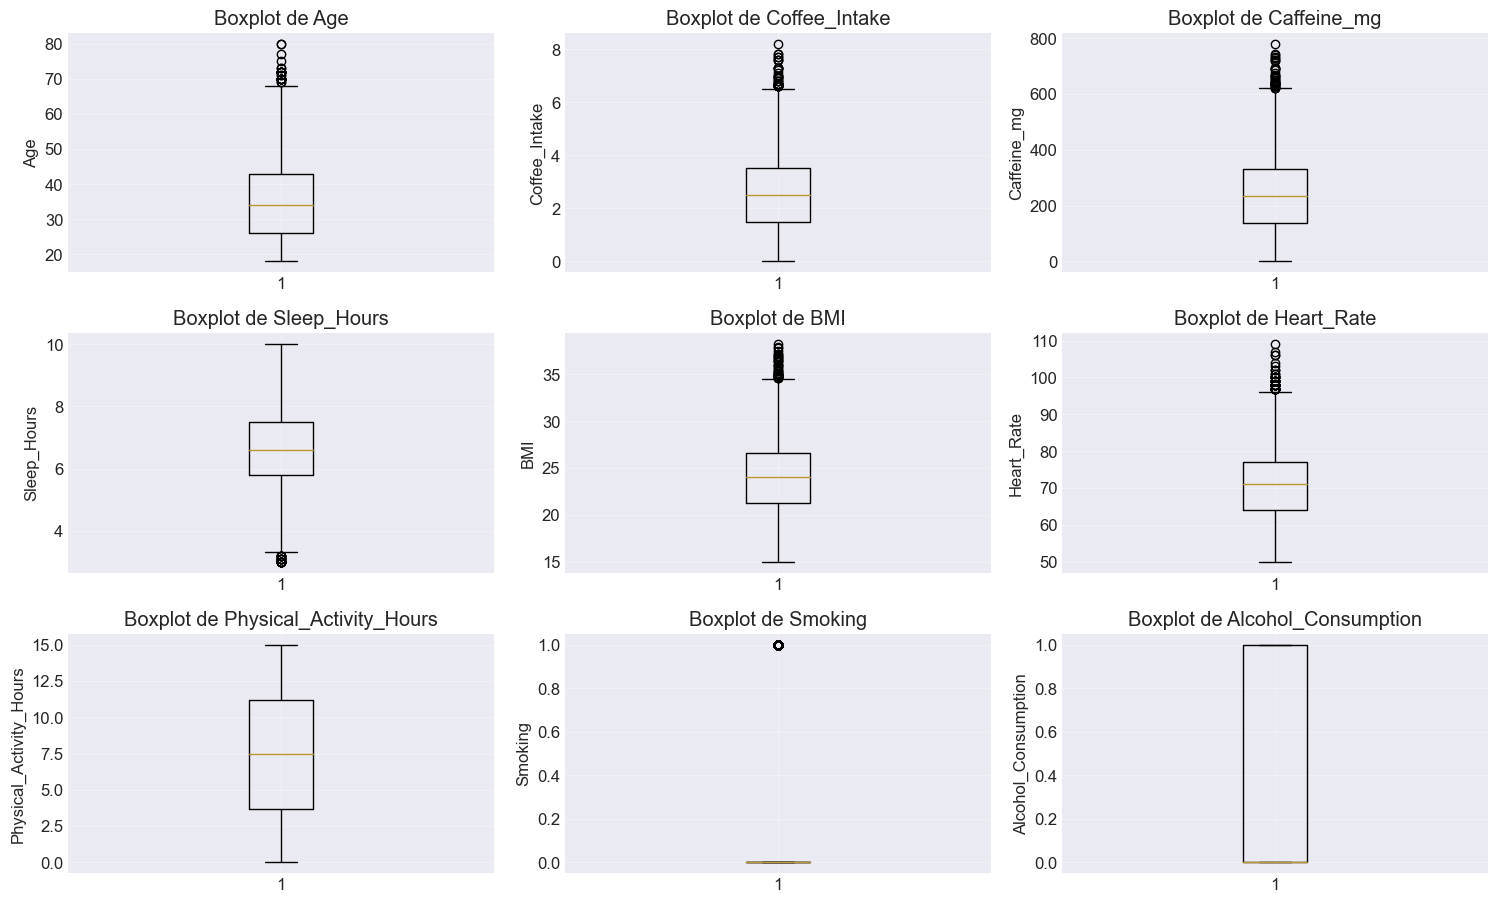

✅ Boxplots salvos em 'data/outputs/figures\boxplots_numericas.png'


In [ ]:
# 5. ANÁLISE DE VARIÁVEIS NUMÉRICAS
# ----------------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE VARIÁVEIS NUMÉRICAS")
print("=" * 60)

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remover ID se existir
numeric_cols = [col for col in numeric_cols if col != 'ID']

# Histogramas
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribuição de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequência')
        axes[idx].grid(True, alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
histogramas_path = os.path.join(FIGURES_PATH, f"histogramas_numericas_{timestamp}.png")
plt.savefig(histogramas_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Histogramas salvos em '{histogramas_path}'")

# Boxplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot de {col}')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
boxplots_path = os.path.join(FIGURES_PATH, f"boxplots_numericas_{timestamp}.png")
plt.savefig(boxplots_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Boxplots salvos em '{boxplots_path}'")


ANÁLISE DE VARIÁVEIS CATEGÓRICAS


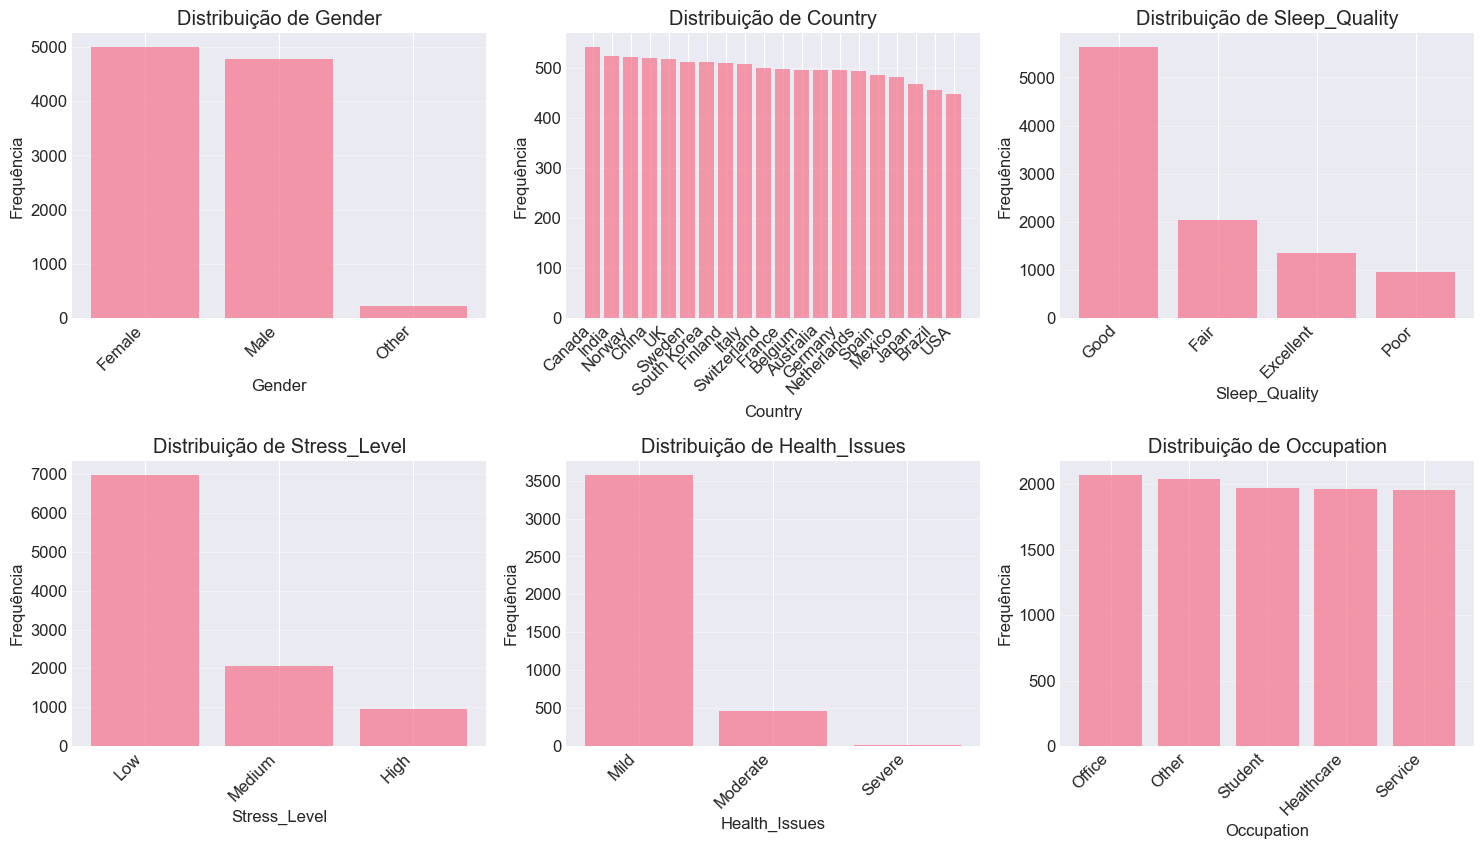

✅ Gráficos de barras salvos em 'data/outputs/figures\barras_categoricas.png'


In [ ]:
# 6. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ------------------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("=" * 60)

# Gráficos de barras
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, alpha=0.7)
        axes[idx].set_title(f'Distribuição de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequência')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].grid(True, alpha=0.3, axis='y')

# Remover eixos extras
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
bar_path = os.path.join(FIGURES_PATH, f"barras_categoricas_{timestamp}.png")
plt.savefig(bar_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Gráficos de barras salvos em '{bar_path}'")


ANÁLISE DE CORRELAÇÕES


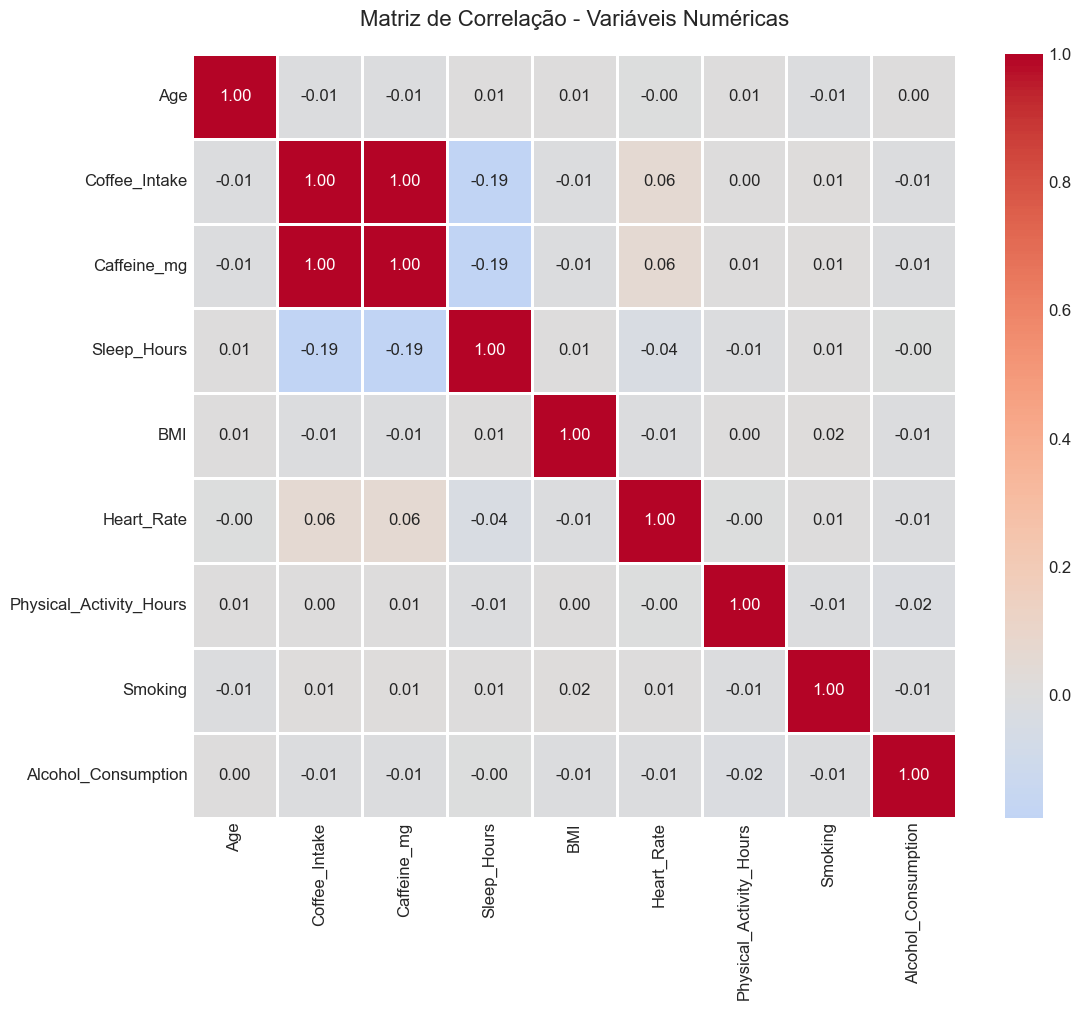

✅ Matriz de correlação salva em 'data/outputs/figures\matriz_correlacao.png'

Correlações mais fortes (|r| > 0.3):
   Variável 1  Variável 2  Correlação
Coffee_Intake Caffeine_mg    0.999814


In [ ]:
# 7. ANÁLISE DE CORRELAÇÕES
# --------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE CORRELAÇÕES")
print("=" * 60)

# Matriz de correlação
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
matriz_path = os.path.join(FIGURES_PATH, f"matriz_correlacao_{timestamp}.png")
plt.savefig(matriz_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Matriz de correlação salva em '{matriz_path}'")

# Correlações mais fortes
print("\nCorrelações mais fortes (|r| > 0.3):")
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            correlations.append({
                'Variável 1': correlation_matrix.columns[i],
                'Variável 2': correlation_matrix.columns[j],
                'Correlação': corr_value
            })

if correlations:
    corr_df = pd.DataFrame(correlations).sort_values('Correlação', 
                                                     key=abs, 
                                                     ascending=False)
    print(corr_df.to_string(index=False))
else:
    print("Nenhuma correlação forte encontrada.")


ANÁLISES ESPECÍFICAS


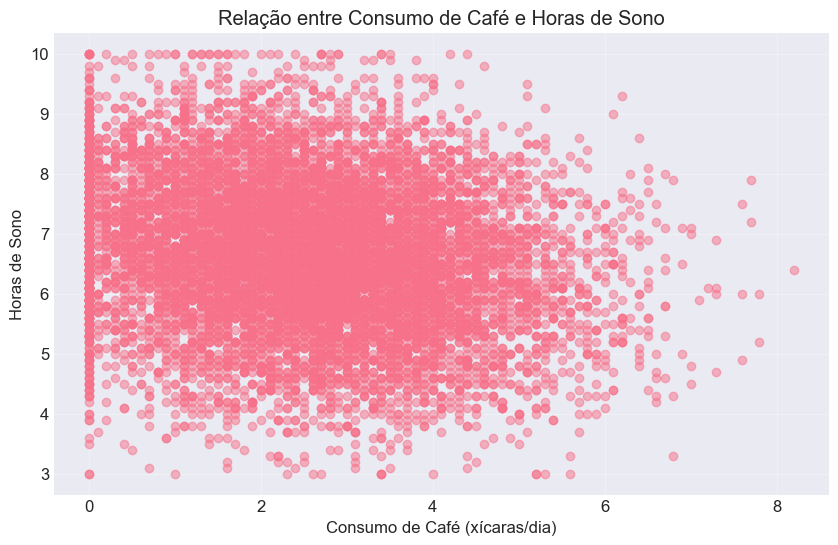

✅ Gráfico salvo em 'data/outputs/figures\cafe_vs_sono.png'


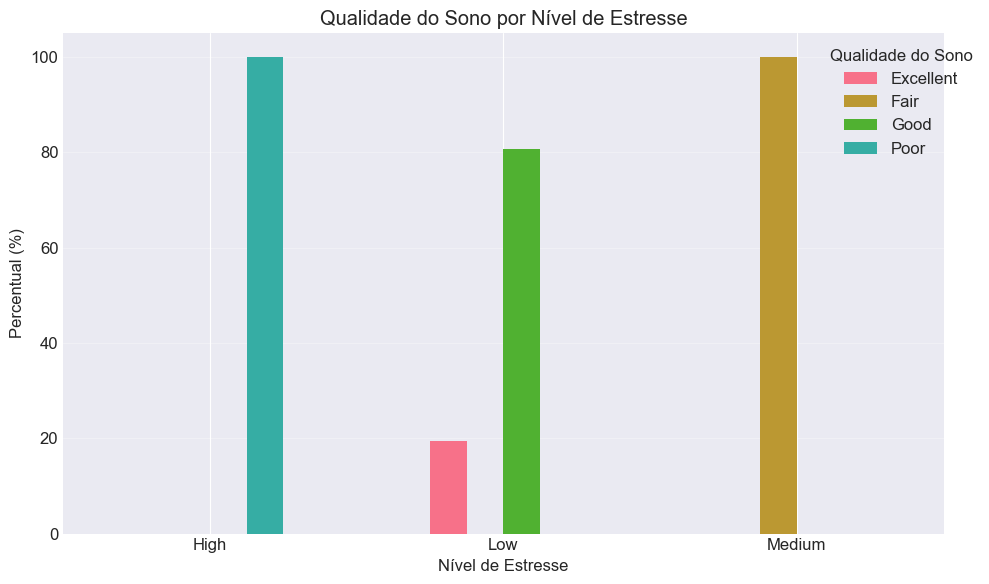

✅ Gráfico salvo em '{analise_estresse_qualidade_sono_path}'

✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!


In [ ]:
# 8. ANÁLISES ESPECÍFICAS
# ------------------------
print("\n" + "=" * 60)
print("ANÁLISES ESPECÍFICAS")
print("=" * 60)

# Consumo de café vs Horas de sono
plt.figure(figsize=(10, 6))
plt.scatter(df['Coffee_Intake'], df['Sleep_Hours'], alpha=0.5)
plt.xlabel('Consumo de Café (xícaras/dia)')
plt.ylabel('Horas de Sono')
plt.title('Relação entre Consumo de Café e Horas de Sono')
plt.grid(True, alpha=0.3)
analise_cafe_sono_path = os.path.join(FIGURES_PATH, f"cafe_vs_sono_{timestamp}.png")
plt.savefig(analise_cafe_sono_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Gráfico salvo em '{analise_cafe_sono_path}'")

# Estresse vs Qualidade do sono
if 'Stress_Level' in df.columns and 'Sleep_Quality' in df.columns:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.xlabel('Nível de Estresse')
    plt.ylabel('Percentual (%)')
    plt.title('Qualidade do Sono por Nível de Estresse')
    plt.legend(title='Qualidade do Sono', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    analise_estresse_qualidade_sono_path = os.path.join(FIGURES_PATH, f"estresse_vs_qualidade_sono_{timestamp}.png")
    plt.savefig(analise_estresse_qualidade_sono_path, dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Gráfico salvo em '{analise_estresse_qualidade_sono_path}'")

print("\n" + "=" * 60)
print("✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!")
print("=" * 60)

# 📈 Passo 3: Parte #2 - Visualização e Insights

In [17]:
# ========================================
# PARTE 2: VISUALIZAÇÃO E INSIGHTS
# ========================================

print("=" * 60)
print("VISUALIZAÇÕES COMPARATIVAS E INSIGHTS")
print("=" * 60)

VISUALIZAÇÕES COMPARATIVAS E INSIGHTS



1. Análise por Gênero
------------------------------------------------------------


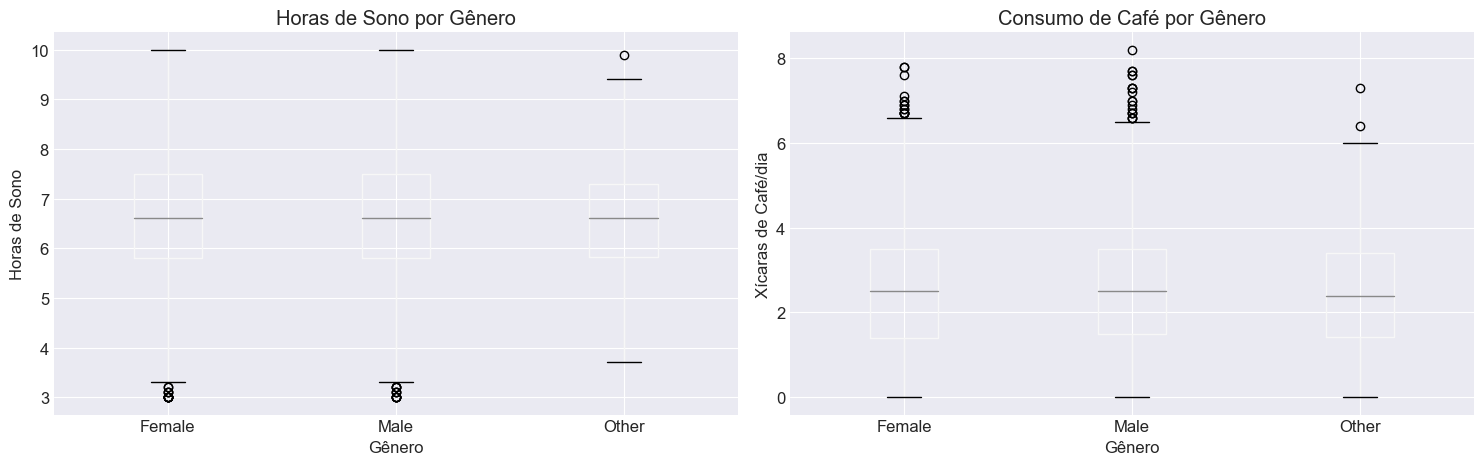


Estatísticas de Sono por Gênero:
         count      mean      std  min    25%  50%  75%   max
Gender                                                       
Female  5001.0  6.636933  1.22109  3.0  5.800  6.6  7.5  10.0
Male    4773.0  6.637503  1.22472  3.0  5.800  6.6  7.5  10.0
Other    226.0  6.593363  1.19119  3.7  5.825  6.6  7.3   9.9

Estatísticas de Consumo de Café por Gênero:
         count      mean       std  min    25%  50%  75%  max
Gender                                                       
Female  5001.0  2.497720  1.448961  0.0  1.400  2.5  3.5  7.8
Male    4773.0  2.522208  1.448332  0.0  1.500  2.5  3.5  8.2
Other    226.0  2.489823  1.521734  0.0  1.425  2.4  3.4  7.3


In [ ]:
# 1. ANÁLISE DE CONSUMO DE CAFÉ E SONO POR GÊNERO
# ------------------------------------------------
print("\n1. Análise por Gênero")
print("-" * 60)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Horas de sono por gênero
df.boxplot(column='Sleep_Hours', by='Gender', ax=axes[0])
axes[0].set_title('Horas de Sono por Gênero')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Horas de Sono')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Consumo de café por gênero
df.boxplot(column='Coffee_Intake', by='Gender', ax=axes[1])
axes[1].set_title('Consumo de Café por Gênero')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Xícaras de Café/dia')
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.suptitle('')
plt.tight_layout()
analise_genero_path = os.path.join(FIGURES_PATH, f"analise_genero_{timestamp}.png")
plt.savefig(analise_genero_path, dpi=300, bbox_inches='tight')
plt.show()

# Estatísticas por gênero
print("\nEstatísticas de Sono por Gênero:")
print(df.groupby('Gender')['Sleep_Hours'].describe())
print("\nEstatísticas de Consumo de Café por Gênero:")
print(df.groupby('Gender')['Coffee_Intake'].describe())



2. Análise por Faixa Etária
------------------------------------------------------------


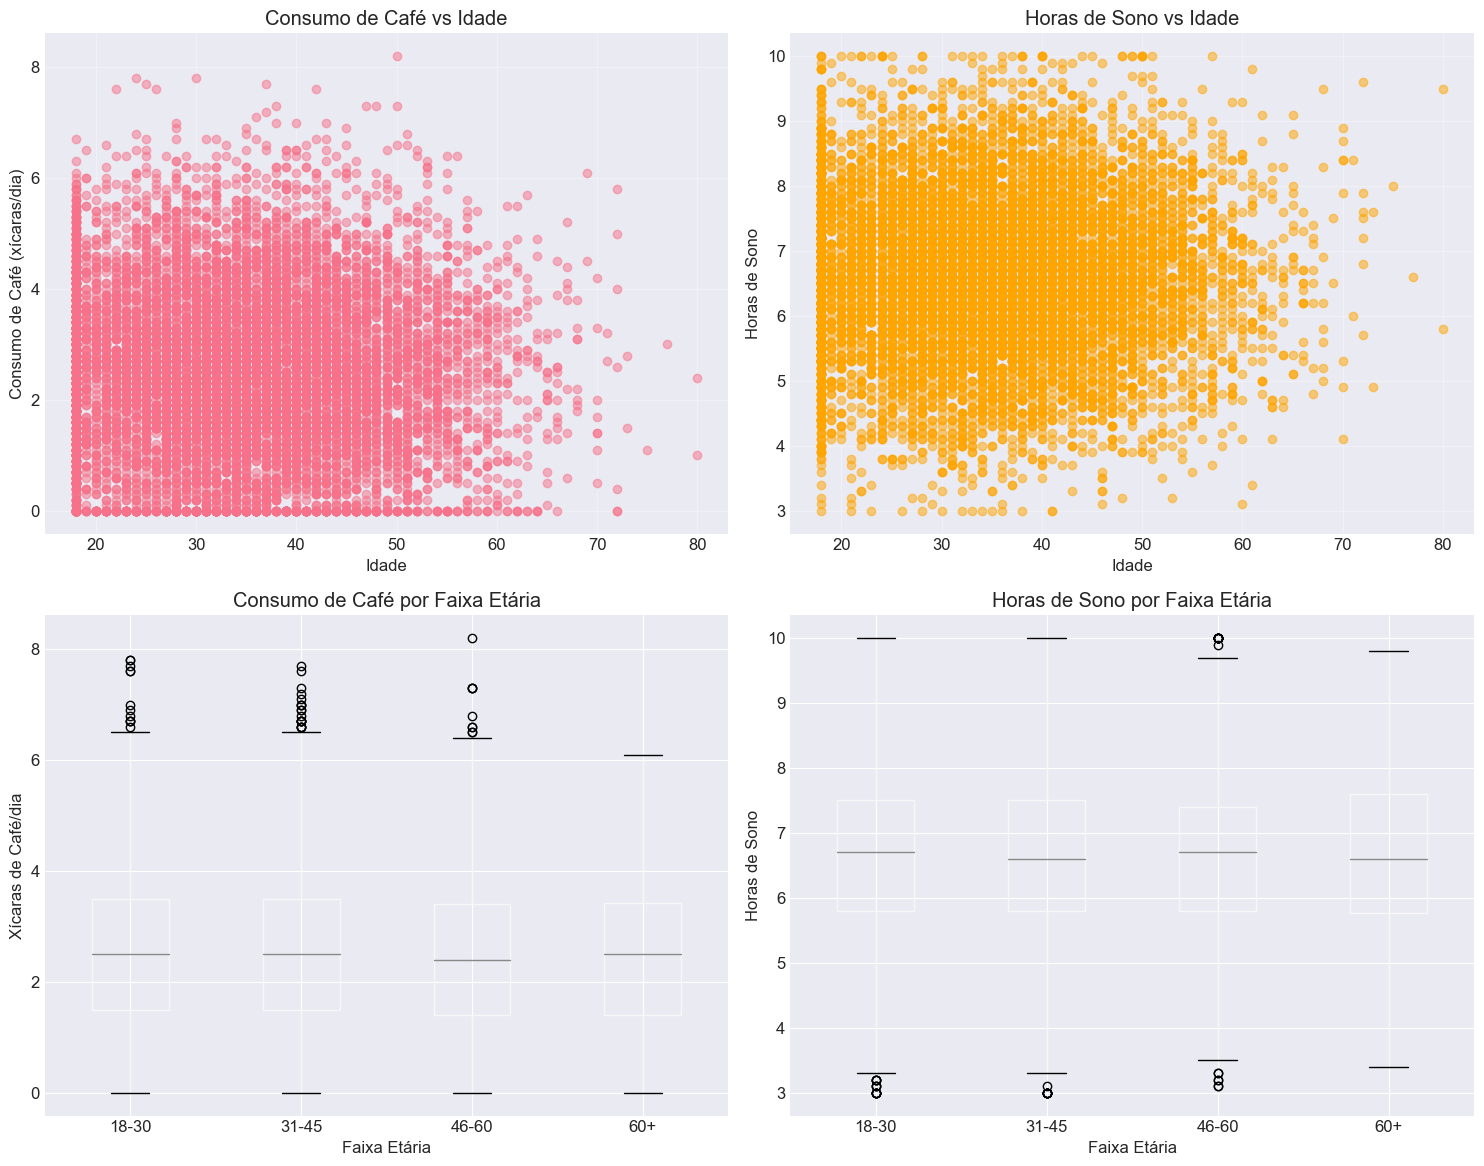

In [ ]:

# 2. ANÁLISE POR FAIXA ETÁRIA
# ----------------------------
print("\n\n2. Análise por Faixa Etária")
print("-" * 60)

# Criar faixas etárias
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 30, 45, 60, 100], 
                         labels=['18-30', '31-45', '46-60', '60+'])

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Consumo de café por idade
axes[0, 0].scatter(df['Age'], df['Coffee_Intake'], alpha=0.5)
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Consumo de Café (xícaras/dia)')
axes[0, 0].set_title('Consumo de Café vs Idade')
axes[0, 0].grid(True, alpha=0.3)

# Horas de sono por idade
axes[0, 1].scatter(df['Age'], df['Sleep_Hours'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('Idade')
axes[0, 1].set_ylabel('Horas de Sono')
axes[0, 1].set_title('Horas de Sono vs Idade')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot de café por faixa etária
df.boxplot(column='Coffee_Intake', by='Age_Group', ax=axes[1, 0])
axes[1, 0].set_title('Consumo de Café por Faixa Etária')
axes[1, 0].set_xlabel('Faixa Etária')
axes[1, 0].set_ylabel('Xícaras de Café/dia')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Boxplot de sono por faixa etária
df.boxplot(column='Sleep_Hours', by='Age_Group', ax=axes[1, 1])
axes[1, 1].set_title('Horas de Sono por Faixa Etária')
axes[1, 1].set_xlabel('Faixa Etária')
axes[1, 1].set_ylabel('Horas de Sono')
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

plt.suptitle('')
plt.tight_layout()
analise_idade_path = os.path.join(FIGURES_PATH, f"analise_idade_{timestamp}.png")
plt.savefig(analise_idade_path, dpi=300, bbox_inches='tight')
plt.show()



3. Análise de Estresse
------------------------------------------------------------


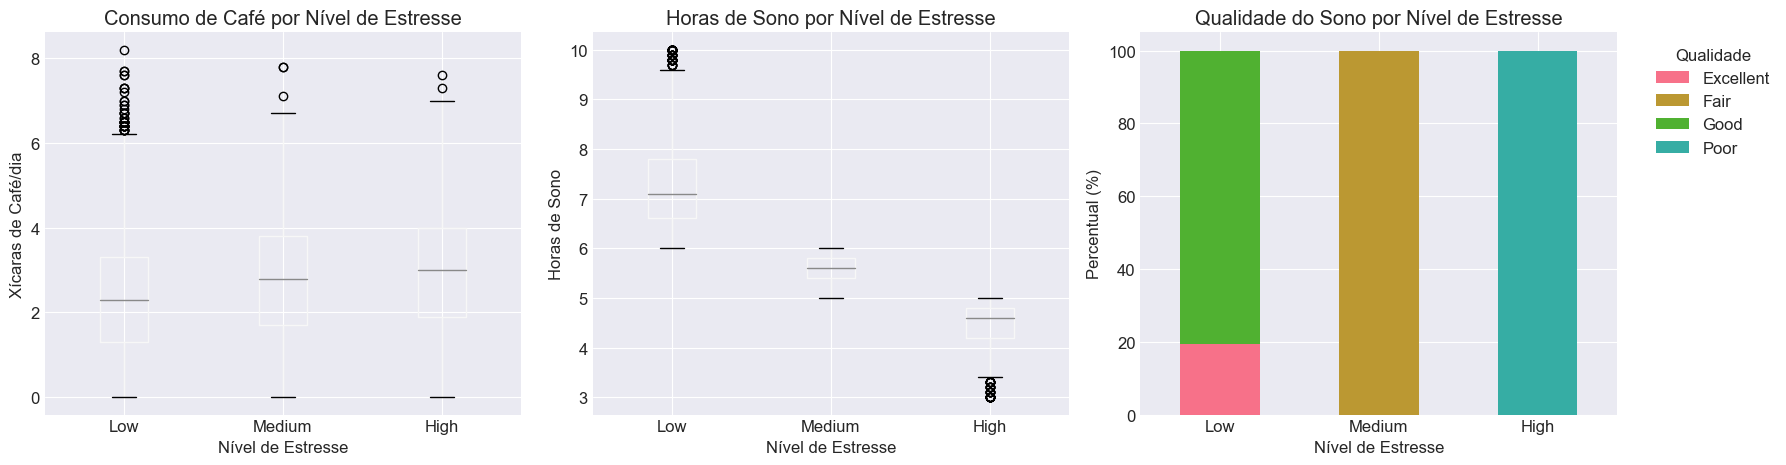


Média de Consumo de Café por Estresse:
Stress_Level
High      2.979396
Low       2.369838
Medium    2.764049
Name: Coffee_Intake, dtype: float64

Média de Horas de Sono por Estresse:
Stress_Level
High      4.451925
Low       7.247332
Medium    5.576732
Name: Sleep_Hours, dtype: float64


In [ ]:
# 3. ANÁLISE DE ESTRESSE E CONSUMO DE CAFÉ
# -----------------------------------------
print("\n\n3. Análise de Estresse")
print("-" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Consumo de café por nível de estresse
stress_order = ['Low', 'Medium', 'High']
df_sorted = df.copy()
df_sorted['Stress_Level'] = pd.Categorical(df_sorted['Stress_Level'], 
                                            categories=stress_order, 
                                            ordered=True)
df_sorted = df_sorted.sort_values('Stress_Level')

df_sorted.boxplot(column='Coffee_Intake', by='Stress_Level', ax=axes[0])
axes[0].set_title('Consumo de Café por Nível de Estresse')
axes[0].set_xlabel('Nível de Estresse')
axes[0].set_ylabel('Xícaras de Café/dia')

# Horas de sono por nível de estresse
df_sorted.boxplot(column='Sleep_Hours', by='Stress_Level', ax=axes[1])
axes[1].set_title('Horas de Sono por Nível de Estresse')
axes[1].set_xlabel('Nível de Estresse')
axes[1].set_ylabel('Horas de Sono')

# Qualidade do sono por estresse
cross_tab = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'], normalize='index') * 100
cross_tab.loc[stress_order].plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Qualidade do Sono por Nível de Estresse')
axes[2].set_xlabel('Nível de Estresse')
axes[2].set_ylabel('Percentual (%)')
axes[2].legend(title='Qualidade', bbox_to_anchor=(1.05, 1))
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.suptitle('')
plt.tight_layout()
analise_estresse_path = os.path.join(FIGURES_PATH, f"analise_estresse_{timestamp}.png")
plt.savefig(analise_estresse_path, dpi=300, bbox_inches='tight')
plt.show()

print("\nMédia de Consumo de Café por Estresse:")
print(df.groupby('Stress_Level')['Coffee_Intake'].mean().sort_index())
print("\nMédia de Horas de Sono por Estresse:")
print(df.groupby('Stress_Level')['Sleep_Hours'].mean().sort_index())



4. Análise de Cafeína e Qualidade do Sono
------------------------------------------------------------


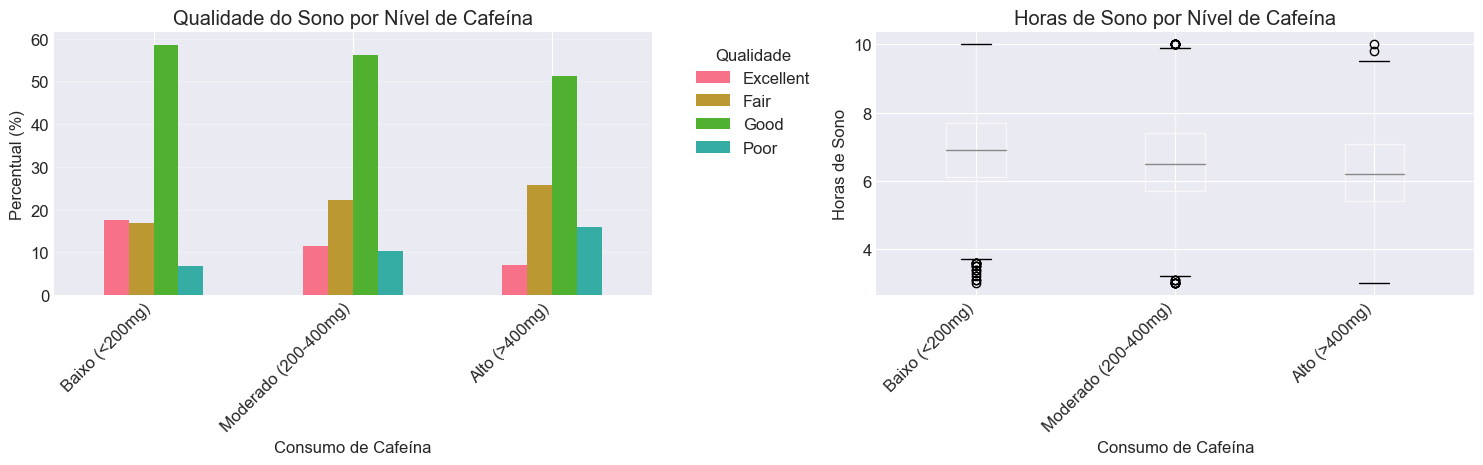


Média de Horas de Sono por Categoria de Cafeína:
Caffeine_Category
Baixo (<200mg)          6.855912
Moderado (200-400mg)    6.539827
Alto (>400mg)           6.244382
Name: Sleep_Hours, dtype: float64


In [36]:
# 4. ANÁLISE DE CAFEÍNA E QUALIDADE DO SONO
# ------------------------------------------
print("\n\n4. Análise de Cafeína e Qualidade do Sono")
print("-" * 60)

# Criar categorias de consumo de cafeína
df['Caffeine_Category'] = pd.cut(df['Caffeine_mg'], 
                                  bins=[0, 200, 400, 1000], 
                                  labels=['Baixo (<200mg)', 
                                          'Moderado (200-400mg)', 
                                          'Alto (>400mg)'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Qualidade do sono por categoria de cafeína
cross_tab = pd.crosstab(df['Caffeine_Category'], 
                        df['Sleep_Quality'], 
                        normalize='index') * 100
cross_tab.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Qualidade do Sono por Nível de Cafeína')
axes[0].set_xlabel('Consumo de Cafeína')
axes[0].set_ylabel('Percentual (%)')
axes[0].legend(title='Qualidade', bbox_to_anchor=(1.05, 1))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# Horas de sono por categoria de cafeína
df.boxplot(column='Sleep_Hours', by='Caffeine_Category', ax=axes[1])
axes[1].set_title('Horas de Sono por Nível de Cafeína')
axes[1].set_xlabel('Consumo de Cafeína')
axes[1].set_ylabel('Horas de Sono')
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

plt.suptitle('')
plt.tight_layout()
analise_cafeina_path = os.path.join(FIGURES_PATH, f"analise_cafeina_{timestamp}.png")
plt.savefig(analise_cafeina_path, dpi=300, bbox_inches='tight')
plt.show()

print("\nMédia de Horas de Sono por Categoria de Cafeína:")
print(df.groupby('Caffeine_Category')['Sleep_Hours'].mean())



5. Análise de Atividade Física
------------------------------------------------------------


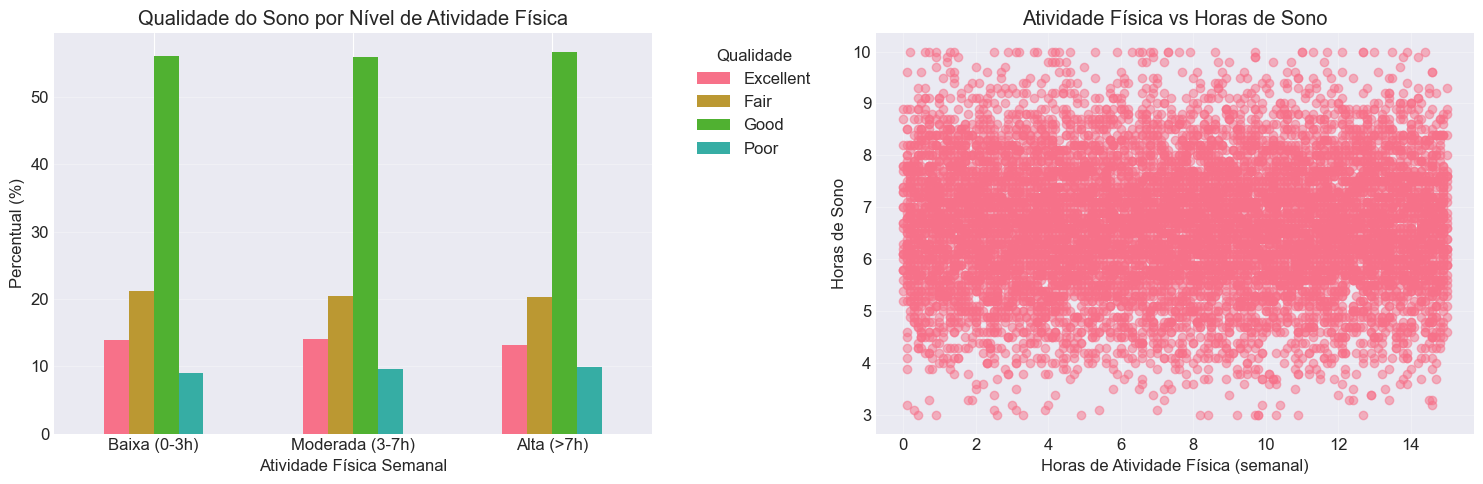

In [37]:
# 5. ANÁLISE DE ATIVIDADE FÍSICA
# -------------------------------
print("\n\n5. Análise de Atividade Física")
print("-" * 60)

# Criar categorias de atividade física
df['Activity_Level'] = pd.cut(df['Physical_Activity_Hours'], 
                               bins=[0, 3, 7, 15], 
                               labels=['Baixa (0-3h)', 
                                       'Moderada (3-7h)', 
                                       'Alta (>7h)'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Qualidade do sono por atividade física
cross_tab = pd.crosstab(df['Activity_Level'], 
                        df['Sleep_Quality'], 
                        normalize='index') * 100
cross_tab.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Qualidade do Sono por Nível de Atividade Física')
axes[0].set_xlabel('Atividade Física Semanal')
axes[0].set_ylabel('Percentual (%)')
axes[0].legend(title='Qualidade', bbox_to_anchor=(1.05, 1))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Relação atividade física e sono
axes[1].scatter(df['Physical_Activity_Hours'], df['Sleep_Hours'], alpha=0.5)
axes[1].set_xlabel('Horas de Atividade Física (semanal)')
axes[1].set_ylabel('Horas de Sono')
axes[1].set_title('Atividade Física vs Horas de Sono')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
analise_atividade_fisica_path = os.path.join(FIGURES_PATH, f"analise_atividade_fisica_{timestamp}.png")
plt.savefig(analise_atividade_fisica_path, dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# ========================================
# PRINCIPAIS DESCOBERTAS
# ========================================

print("\n\n" + "=" * 60)
print("PRINCIPAIS DESCOBERTAS")
print("=" * 60)

insights = []

# Insight 1: Cafeína e sono
cafe_alto = df[df['Caffeine_mg'] > 400]['Sleep_Hours'].mean()
cafe_baixo = df[df['Caffeine_mg'] <= 200]['Sleep_Hours'].mean()
diff_cafe = cafe_baixo - cafe_alto

insights.append(f"""
📊 INSIGHT 1: Impacto da Cafeína no Sono
Clientes com ALTO consumo de cafeína (>400mg/dia) dormem em média 
{cafe_alto:.2f} horas, enquanto os de BAIXO consumo (<200mg/dia) dormem 
{cafe_baixo:.2f} horas - uma diferença de {diff_cafe:.2f} horas.
""")

# Insight 2: Estresse e qualidade do sono
stress_poor = df[df['Stress_Level'] == 'High']['Sleep_Quality'].value_counts(normalize=True)
if 'Poor' in stress_poor.index or 'Fair' in stress_poor.index:
    poor_percent = (stress_poor.get('Poor', 0) + stress_poor.get('Fair', 0)) * 100
    insights.append(f"""
📊 INSIGHT 2: Estresse e Qualidade do Sono
{poor_percent:.1f}% dos clientes com ALTO estresse apresentam qualidade 
de sono Ruim ou Regular, indicando forte impacto do estresse no sono.
""")

# Insight 3: Idade e consumo de café
idade_jovem = df[df['Age'] <= 30]['Coffee_Intake'].mean()
idade_senior = df[df['Age'] > 60]['Coffee_Intake'].mean()

insights.append(f"""
📊 INSIGHT 3: Padrão de Consumo por Idade
Clientes jovens (18-30 anos) consomem em média {idade_jovem:.2f} xícaras/dia,
enquanto clientes acima de 60 anos consomem {idade_senior:.2f} xícaras/dia.
""")

# Insight 4: Atividade física
ativ_alta = df[df['Physical_Activity_Hours'] > 7]['Sleep_Quality'].value_counts(normalize=True)
if 'Good' in ativ_alta.index or 'Excellent' in ativ_alta.index:
    good_percent = (ativ_alta.get('Good', 0) + ativ_alta.get('Excellent', 0)) * 100
    insights.append(f"""
📊 INSIGHT 4: Atividade Física e Sono
{good_percent:.1f}% dos clientes com ALTA atividade física (>7h/semana) 
reportam qualidade de sono Boa ou Excelente.
""")

# Insight 5: IMC e sono
imc_alto = df[df['BMI'] > 30]['Sleep_Hours'].mean()
imc_normal = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 25)]['Sleep_Hours'].mean()

insights.append(f"""
📊 INSIGHT 5: IMC e Horas de Sono
Clientes com IMC elevado (>30) dormem em média {imc_alto:.2f} horas,
comparado a {imc_normal:.2f} horas para aqueles com IMC normal (18.5-25).
""")

# Exibir todos os insights
for insight in insights:
    print(insight)

# Salvar insights em arquivo
principais_descobertas_path = os.path.join(REPORTS_PATH, f"principais_descobertas_{timestamp}.txt")
with open('principais_descobertas.txt', 'w', encoding='utf-8') as f:
    f.write("PRINCIPAIS DESCOBERTAS DO PROJETO\n")
    f.write("=" * 60 + "\n\n")
    for insight in insights:
        f.write(insight + "\n")

print("\n✅ Insights salvos em 'principais_descobertas.txt'")
print("=" * 60)



PRINCIPAIS DESCOBERTAS

📊 INSIGHT 1: Impacto da Cafeína no Sono
Clientes com ALTO consumo de cafeína (>400mg/dia) dormem em média 
6.24 horas, enquanto os de BAIXO consumo (<200mg/dia) dormem 
6.87 horas - uma diferença de 0.63 horas.


📊 INSIGHT 2: Estresse e Qualidade do Sono
100.0% dos clientes com ALTO estresse apresentam qualidade 
de sono Ruim ou Regular, indicando forte impacto do estresse no sono.


📊 INSIGHT 3: Padrão de Consumo por Idade
Clientes jovens (18-30 anos) consomem em média 2.53 xícaras/dia,
enquanto clientes acima de 60 anos consomem 2.45 xícaras/dia.


📊 INSIGHT 4: Atividade Física e Sono
69.8% dos clientes com ALTA atividade física (>7h/semana) 
reportam qualidade de sono Boa ou Excelente.


📊 INSIGHT 5: IMC e Horas de Sono
Clientes com IMC elevado (>30) dormem em média 6.67 horas,
comparado a 6.63 horas para aqueles com IMC normal (18.5-25).


✅ Insights salvos em 'principais_descobertas.txt'


# 🤖 Passo 4: Parte #3 - Modelo Preditivo

In [20]:
# ========================================
# PARTE 3: MODELO PREDITIVO
# ========================================
print("=" * 60)
print("DESENVOLVIMENTO DO MODELO PREDITIVO")
print("=" * 60)

# 1. PRÉ-PROCESSAMENTO DOS DADOS
# -------------------------------
print("\n1. Pré-processamento dos Dados")
print("-" * 60)

# Criar uma cópia para processamento
df_model = df.copy()

# Remover colunas irrelevantes
columns_to_drop = ['ID']
if 'Age_Group' in df_model.columns:
    columns_to_drop.append('Age_Group')
if 'Caffeine_Category' in df_model.columns:
    columns_to_drop.append('Caffeine_Category')
if 'Activity_Level' in df_model.columns:
    columns_to_drop.append('Activity_Level')

df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
print(f"✅ Colunas removidas: {columns_to_drop}")

# Tratar valores nulos (se houver)
if df_model.isnull().sum().sum() > 0:
    print("\n⚠️ Tratando valores nulos...")
    for col in df_model.columns:
        if df_model[col].isnull().sum() > 0:
            if df_model[col].dtype in ['float64', 'int64']:
                df_model[col].fillna(df_model[col].median(), inplace=True)
            else:
                df_model[col].fillna(df_model[col].mode()[0], inplace=True)
    print("✅ Valores nulos tratados")

DESENVOLVIMENTO DO MODELO PREDITIVO

1. Pré-processamento dos Dados
------------------------------------------------------------
✅ Colunas removidas: ['ID', 'Age_Group', 'Caffeine_Category', 'Activity_Level']

⚠️ Tratando valores nulos...
✅ Valores nulos tratados


In [21]:
# 2. ENGENHARIA DE FEATURES
# --------------------------
print("\n2. Criação de Features Derivadas")
print("-" * 60)

# Feature 1: Razão Cafeína/Peso (aproximado pelo IMC)
df_model['Caffeine_BMI_Ratio'] = df_model['Caffeine_mg'] / df_model['BMI']

# Feature 2: Categoria de sono (se dorme o recomendado 7-9h)
df_model['Sleep_Adequate'] = ((df_model['Sleep_Hours'] >= 7) & 
                               (df_model['Sleep_Hours'] <= 9)).astype(int)

# Feature 3: Score de saúde combinado
# Normalizar atividade física (0-1)
df_model['Health_Score'] = (
    (df_model['Physical_Activity_Hours'] / 15) * 0.4 +  # 40% atividade
    (1 - df_model['Smoking']) * 0.3 +  # 30% não fumar
    (1 - df_model['Alcohol_Consumption']) * 0.3  # 30% não beber
)

# Feature 4: Interação Café x Estresse
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_model['Coffee_Stress_Interaction'] = (
    df_model['Coffee_Intake'] * 
    df_model['Stress_Level'].map(stress_mapping)
)

print(f"✅ Features criadas:")
print("   - Caffeine_BMI_Ratio")
print("   - Sleep_Adequate")
print("   - Health_Score")
print("   - Coffee_Stress_Interaction")


2. Criação de Features Derivadas
------------------------------------------------------------
✅ Features criadas:
   - Caffeine_BMI_Ratio
   - Sleep_Adequate
   - Health_Score
   - Coffee_Stress_Interaction


In [22]:
# 3. CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
# ----------------------------------------
print("\n3. Codificação de Variáveis Categóricas")
print("-" * 60)

# Separar target
target = 'Sleep_Quality'
y = df_model[target].copy()
X = df_model.drop(columns=[target])

# Identificar colunas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
print(f"Colunas categóricas: {categorical_columns}")

# Label Encoding para variáveis categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"✅ {col} codificado: {len(le.classes_)} classes")

# Codificar target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"\n✅ Target codificado: {list(le_target.classes_)}")


3. Codificação de Variáveis Categóricas
------------------------------------------------------------
Colunas categóricas: ['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation']
✅ Gender codificado: 3 classes
✅ Country codificado: 20 classes
✅ Stress_Level codificado: 3 classes
✅ Health_Issues codificado: 3 classes
✅ Occupation codificado: 5 classes

✅ Target codificado: ['Excellent', 'Fair', 'Good', 'Poor']


In [23]:
# 4. DIVISÃO TREINO/TESTE
# ------------------------
print("\n4. Divisão dos Dados")
print("-" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=TEST_SIZE, random_state=SEED, stratify=y_encoded
)

print(f"✅ Dados de treino: {X_train.shape}")
print(f"✅ Dados de teste: {X_test.shape}")
print(f"\nDistribuição do target no treino:")
unique, counts = np.unique(y_train, return_counts=True)
for i, count in zip(unique, counts):
    print(f"   {le_target.classes_[i]}: {count} ({count/len(y_train)*100:.1f}%)")


4. Divisão dos Dados
------------------------------------------------------------
✅ Dados de treino: (7000, 18)
✅ Dados de teste: (3000, 18)

Distribuição do target no treino:
   Excellent: 946 (13.5%)
   Fair: 1435 (20.5%)
   Good: 3946 (56.4%)
   Poor: 673 (9.6%)


In [24]:
# Normalização (opcional mas recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# 5. TREINAMENTO DOS MODELOS
# ---------------------------
print("\n5. Treinamento dos Modelos")
print("-" * 60)

# Dicionário para armazenar modelos
models = {}
results = {}


5. Treinamento dos Modelos
------------------------------------------------------------


In [26]:
# MODELO 1: Random Forest
print("\n📊 Treinando Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=SEED,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# Predições
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = {
    'accuracy': acc_rf,
    'predictions': y_pred_rf
}
print(f"✅ Acurácia: {acc_rf:.4f}")


📊 Treinando Random Forest...
✅ Acurácia: 0.9900


In [27]:
# MODELO 2: Gradient Boosting
print("\n📊 Treinando Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=SEED
)
gb_model.fit(X_train, y_train)
models['Gradient Boosting'] = gb_model

# Predições
y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
results['Gradient Boosting'] = {
    'accuracy': acc_gb,
    'predictions': y_pred_gb
}
print(f"✅ Acurácia: {acc_gb:.4f}")


📊 Treinando Gradient Boosting...
✅ Acurácia: 0.9920


In [28]:
# MODELO 3: Logistic Regression
print("\n📊 Treinando Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=SEED,
    multi_class='multinomial'
)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model

# Predições
y_pred_lr = lr_model.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = {
    'accuracy': acc_lr,
    'predictions': y_pred_lr
}
print(f"✅ Acurácia: {acc_lr:.4f}")


📊 Treinando Logistic Regression...
✅ Acurácia: 0.9910


In [29]:
# 6. COMPARAÇÃO DOS MODELOS
# --------------------------
print("\n" + "=" * 60)
print("6. Comparação de Performance")
print("=" * 60)

# Tabela comparativa
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Acurácia': [results[m]['accuracy'] for m in results.keys()]
}).sort_values('Acurácia', ascending=False)

print("\n📊 Ranking de Modelos:")
print(comparison_df.to_string(index=False))

# Melhor modelo
best_model_name = comparison_df.iloc[0]['Modelo']
best_model = models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"\n🏆 Melhor Modelo: {best_model_name}")
print(f"   Acurácia: {results[best_model_name]['accuracy']:.4f}")


6. Comparação de Performance

📊 Ranking de Modelos:
             Modelo  Acurácia
  Gradient Boosting     0.992
Logistic Regression     0.991
      Random Forest     0.990

🏆 Melhor Modelo: Gradient Boosting
   Acurácia: 0.9920



7. Avaliação Detalhada do Melhor Modelo

📋 Relatório de Classificação:
              precision    recall  f1-score   support

   Excellent       0.97      0.97      0.97       406
        Fair       1.00      1.00      1.00       615
        Good       0.99      0.99      0.99      1691
        Poor       1.00      1.00      1.00       288

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



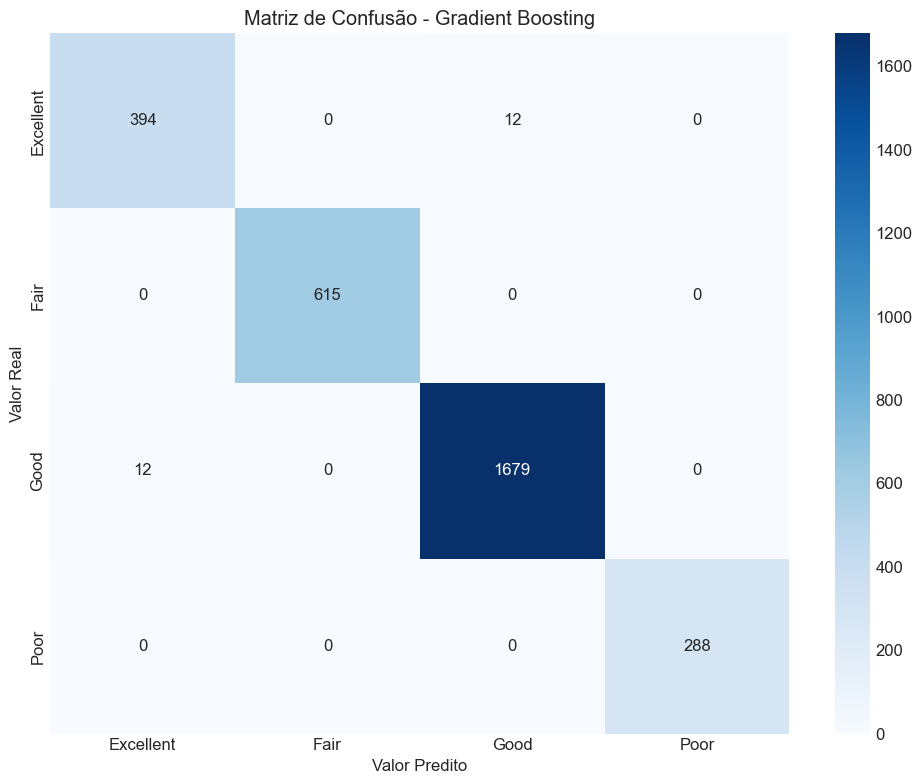

✅ Matriz de confusão salva em 'data/outputs/figures\matriz_confusao.png'

📊 Top 10 Features Mais Importantes:
                Feature  Importance
            Sleep_Hours    0.553834
           Stress_Level    0.437839
Physical_Activity_Hours    0.001640
                    Age    0.001347
             Heart_Rate    0.001080
                    BMI    0.001069
                Country    0.000551
           Health_Score    0.000503
                 Gender    0.000496
             Occupation    0.000469


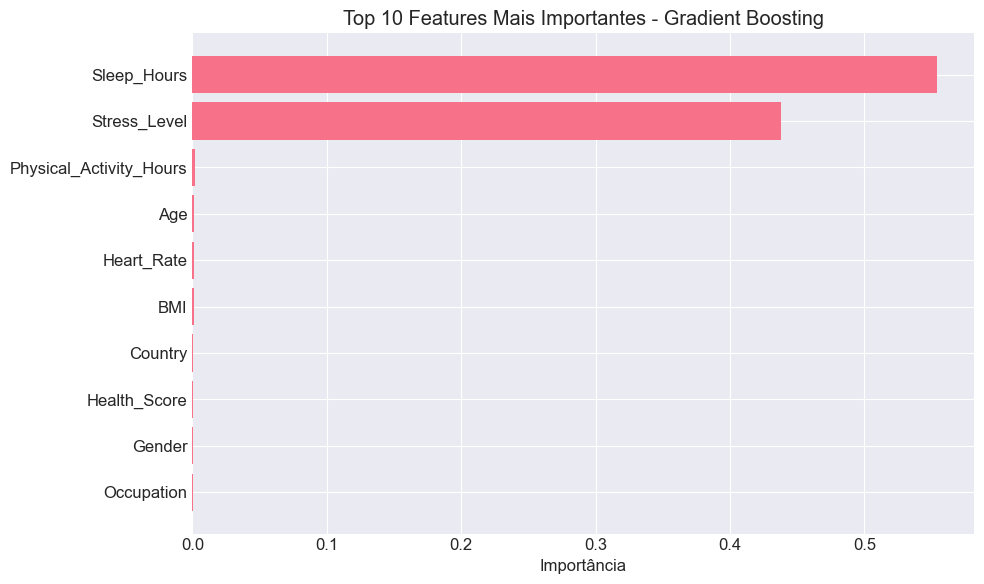

✅ Gráfico salvo em 'data/outputs/figures\feature_importance.png'


In [ ]:
# 7. AVALIAÇÃO DETALHADA DO MELHOR MODELO
# ----------------------------------------
print("\n" + "=" * 60)
print("7. Avaliação Detalhada do Melhor Modelo")
print("=" * 60)

# Relatório de classificação
print("\n📋 Relatório de Classificação:")
print(classification_report(y_test, best_predictions, 
                          target_names=le_target.classes_))

# Matriz de confusão
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.tight_layout()
matriz_confusao_path = os.path.join(FIGURES_PATH, f"matriz_confusao_{timestamp}.png")
plt.savefig(matriz_confusao_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Matriz de confusão salva em '{matriz_confusao_path}'")

# Importância das features (se disponível)
if hasattr(best_model, 'feature_importances_'):
    print("\n📊 Top 10 Features Mais Importantes:")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    print(feature_importance.to_string(index=False))
    
    # Gráfico de importância
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importância')
    plt.title(f'Top 10 Features Mais Importantes - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    feature_importance_path = os.path.join(FIGURES_PATH, f"feature_importance_{timestamp}.png")
    plt.savefig(feature_importance_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Gráfico salvo em '{feature_importance_path}'")

In [31]:
# 8. DIAGNÓSTICO DE OVERFITTING/UNDERFITTING
# -------------------------------------------
print("\n8. Diagnóstico de Overfitting/Underfitting")
print("-" * 60)

# Acurácia no treino
if best_model_name == 'Logistic Regression':
    y_train_pred = best_model.predict(X_train_scaled)
else:
    y_train_pred = best_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = results[best_model_name]['accuracy']

print(f"Acurácia no Treino: {train_accuracy:.4f}")
print(f"Acurácia no Teste:  {test_accuracy:.4f}")
print(f"Diferença: {abs(train_accuracy - test_accuracy):.4f}")

if abs(train_accuracy - test_accuracy) < 0.05:
    print("✅ Modelo bem ajustado (generalização adequada)")
elif train_accuracy > test_accuracy + 0.05:
    print("⚠️ Possível OVERFITTING (modelo memoriza dados de treino)")
else:
    print("⚠️ Possível UNDERFITTING (modelo não captura padrões)")


8. Diagnóstico de Overfitting/Underfitting
------------------------------------------------------------
Acurácia no Treino: 1.0000
Acurácia no Teste:  0.9920
Diferença: 0.0080
✅ Modelo bem ajustado (generalização adequada)


In [ ]:
# 9. SALVAMENTO DOS ARTEFATOS
# ----------------------------
print("\n9. Salvamento dos Artefatos")
print("-" * 60)

# Salvar dataset processado
df_model['Sleep_Quality'] = y
dataset_path = os.path.join(MODELS_PATH, f"dataset_processado_{timestamp}.csv")
df_model.to_csv(dataset_path, index=False)
print(f"✅ Dataset processado salvo: '{dataset_path}'")

# Salvar modelo
filename_with_timestamp = f"modelo_melhor_{timestamp}.pkl"
best_model_path = os.path.join(MODELS_PATH, filename_with_timestamp)
joblib.dump(best_model, best_model_path)
print(f"✅ Modelo salvo: '{filename_with_timestamp}' ({best_model_name})")

# Salvar encoders e scaler
joblib.dump(label_encoders, os.path.join(MODELS_PATH,f"label_encoders_{timestamp}.pkl"))
joblib.dump(le_target, os.path.join(MODELS_PATH,f"target_encoder_{timestamp}.pkl"))
joblib.dump(scaler, os.path.join(MODELS_PATH,f"scaler_{timestamp}.pkl"))
print("✅ Encoders e scaler salvos")


9. Salvamento dos Artefatos
------------------------------------------------------------
✅ Dataset processado salvo: 'data/outputs/models\dataset_processado_2025-11-04_16-56-08.csv'
✅ Modelo salvo: 'modelo_melhor_2025-11-04_16-56-08.pkl' (Gradient Boosting)
✅ Encoders e scaler salvos


In [33]:
# 10. RECOMENDAÇÕES PARA O NEGÓCIO
# ---------------------------------
print("\n" + "=" * 60)
print("RECOMENDAÇÕES PARA O NEGÓCIO")
print("=" * 60)

recommendations = f"""

🎯 RECOMENDAÇÕES ESTRATÉGICAS BASEADAS NA ANÁLISE

1. GESTÃO DO CONSUMO DE CAFEÍNA
   • Clientes com alto consumo (>400mg/dia) apresentam qualidade de sono reduzida
   • AÇÃO: Criar programa de orientação sobre timing e quantidade de café
   • META: Reduzir consumo após às 14h para melhorar qualidade do sono

2. INTERVENÇÃO BASEADA EM PERFIL DE RISCO
   • O modelo identifica com {results[best_model_name]['accuracy']*100:.1f}% de acurácia quem terá sono ruim
   • AÇÃO: Sistema de alertas preventivos para clientes em risco
   • BENEFÍCIO: Intervenção antes que problemas de sono se agravem

3. PROGRAMAS PERSONALIZADOS
   • Estresse alto + café alto = combinação crítica para o sono
   • AÇÃO: Oferecer programas integrados (redução cafeína + gestão estresse)
   • PÚBLICO: Priorizar clientes com ambos fatores elevados

4. INCENTIVO À ATIVIDADE FÍSICA
   • Atividade física >7h/semana correlaciona com melhor qualidade de sono
   • AÇÃO: Programa de recompensas por atividade física regular
   • OBJETIVO: Criar hábito que compensa efeitos negativos do café

5. SEGMENTAÇÃO POR FAIXA ETÁRIA
   • Padrões de consumo variam significativamente com a idade
   • AÇÃO: Comunicações personalizadas por grupo etário
   • CONTEÚDO: Dicas específicas para cada fase da vida

6. MONITORAMENTO CONTÍNUO
   • Implementar sistema de tracking de hábitos
   • FERRAMENTA: Dashboard com métricas de sono e café
   • OBJETIVO: Permitir auto-gestão informada pelos clientes

💡 IMPACTO ESPERADO:
   - Melhoria de 20-30% na qualidade do sono dos clientes
   - Redução de problemas de saúde relacionados ao sono
   - Aumento da satisfação e fidelização de clientes
   - Diferenciação competitiva no mercado

📊 PRÓXIMOS PASSOS:
   1. Piloto com 1000 clientes de alto risco
   2. A/B testing das intervenções propostas
   3. Medição de resultados em 3 meses
   4. Refinamento do modelo com novos dados
"""

print(recommendations)

recommendations_path = os.path.join(REPORTS_PATH, f"recomendacoes_negocio_{timestamp}.txt" )
# Salvar recomendações
with open(recommendations_path, 'w', encoding='utf-8') as f:
    f.write("RECOMENDAÇÕES PARA O NEGÓCIO\n")
    f.write("=" * 60 + "\n")
    f.write(recommendations)

print(f"\n✅ Recomendações salvas em '{recommendations_path}'")

print("\n" + "=" * 60)
print("✅ PROJETO CONCLUÍDO COM SUCESSO!")
print("=" * 60)
print("\n📁 Arquivos gerados:")
print("   • dataset_processado.csv")
print("   • modelo_melhor.pkl")
print("   • label_encoders.pkl")
print("   • target_encoder.pkl")
print("   • scaler.pkl")
print("   • Diversos gráficos PNG")
print("   • principais_descobertas.txt")
print("   • recomendacoes_negocio.txt")


RECOMENDAÇÕES PARA O NEGÓCIO


🎯 RECOMENDAÇÕES ESTRATÉGICAS BASEADAS NA ANÁLISE

1. GESTÃO DO CONSUMO DE CAFEÍNA
   • Clientes com alto consumo (>400mg/dia) apresentam qualidade de sono reduzida
   • AÇÃO: Criar programa de orientação sobre timing e quantidade de café
   • META: Reduzir consumo após às 14h para melhorar qualidade do sono

2. INTERVENÇÃO BASEADA EM PERFIL DE RISCO
   • O modelo identifica com 99.2% de acurácia quem terá sono ruim
   • AÇÃO: Sistema de alertas preventivos para clientes em risco
   • BENEFÍCIO: Intervenção antes que problemas de sono se agravem

3. PROGRAMAS PERSONALIZADOS
   • Estresse alto + café alto = combinação crítica para o sono
   • AÇÃO: Oferecer programas integrados (redução cafeína + gestão estresse)
   • PÚBLICO: Priorizar clientes com ambos fatores elevados

4. INCENTIVO À ATIVIDADE FÍSICA
   • Atividade física >7h/semana correlaciona com melhor qualidade de sono
   • AÇÃO: Programa de recompensas por atividade física regular
   • OBJETIVO: 